In [2]:
import numpy as np
import pandas as pd
import time
import threading
import matplotlib.pyplot as plt

In [3]:
def generate_matrices(n, size):
    matrices = []
    for i in range(n):
        matrices.append(np.random.rand(size, size))
    return matrices

In [9]:
def matrix_multiply(matrices):
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    result = constant_matrix.copy()
    for matrix in matrices:
        result = np.dot(result, matrix)
    return result

def matrix_multiplication_using_threads(num_threads):
    start_time = time.time()
    threads = []
    for i in range(0, len(matrices), num_threads):
        thread = threading.Thread(target=matrix_multiply, args=(matrices[i:i+num_threads],))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time


num_matrices = 100
matrix_size = 1000
matrices=generate_matrices(num_matrices,matrix_size)


In [10]:
results = {}
for num_threads in range(1, 9):
    time_taken = matrix_multiplication_using_threads(num_threads)
    results[num_threads] = time_taken

In [11]:
results

{1: 1.781517744064331,
 2: 1.7434616088867188,
 3: 1.7064950466156006,
 4: 1.6904149055480957,
 5: 1.9110424518585205,
 6: 1.665402889251709,
 7: 1.7796862125396729,
 8: 1.7363331317901611}

In [12]:
data = pd.DataFrame.from_dict(results, orient='index',columns=['Time(sec)'])
data['Threads'] = results.keys()
data = data.reindex(columns=['Threads','Time(sec)'])
data.set_index('Threads',inplace=True)
data

,Time(sec)
Threads,
1,1.781518
2,1.743462
3,1.706495
4,1.690415
5,1.911042
6,1.665403
7,1.779686
8,1.736333


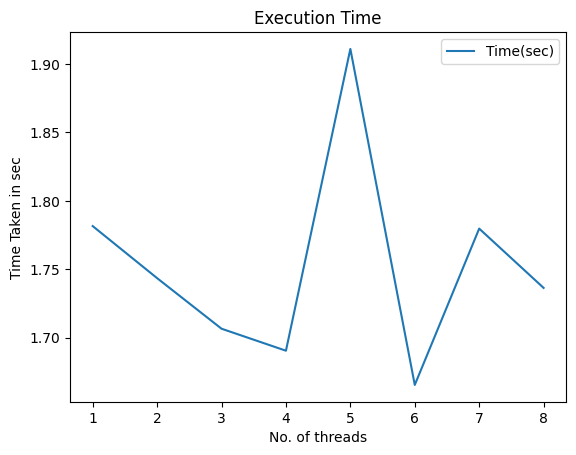

In [13]:
data.plot()
plt.xlabel('No. of threads')
plt.ylabel('Time Taken in sec')
plt.title('Execution Time')
plt.show()